
# Cloud Condensation Nuclei Plots

Example shows how to plot up CCN droplet count
in a size distribution plot.


In [19]:
import act
import matplotlib.pyplot as plt

In [20]:
username = 'mallain'
token = '10fd692feea71fb1'
datastream = 'bnfaosccn2colaspectraM1.b1'
startdate = '2025-05-08'
enddate = '2025-05-11T23:59:59'

In [21]:
# Download and read the data
result_ccn = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_ccn = act.io.read_arm_netcdf(result_ccn)
ds_ccn.clean.cleanup()

[DOWNLOADING] bnfaosccn2colaspectraM1.b1.20250508.010251.nc
[DOWNLOADING] bnfaosccn2colaspectraM1.b1.20250509.000954.nc
[DOWNLOADING] bnfaosccn2colaspectraM1.b1.20250510.002958.nc
[DOWNLOADING] bnfaosccn2colaspectraM1.b1.20250511.005002.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Uin, J., Andrews, E., Enekwizu, O., Hayes, C., & Salwen, C. Cloud
Condensation Nuclei Particle Counter (AOSCCN2COLASPECTRA), 2025-05-08 to
2025-05-11, Bankhead National Forest, AL, USA; Long-term Mobile Facility (BNF),
Bankhead National Forest, AL, AMF3 (Main Site) (M1). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1323896



Variables: ['base_time', 'time_offset', 'time_bounds', 'setpoint_time', 'supersaturation_calculated', 'N_CCN', 'qc_N_CCN', 'N_CCN_fit_coefs', 'N_CCN_fit_error', 'N_CCN_fit_value', 'concentration', 'f_CCN', 'qc_f_CCN', 'alt']


/tmp/ipykernel_650/132956031.py:15: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  disp.axes[0].legend()
/tmp/ipykernel_650/132956031.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  disp.axes[0].legend()


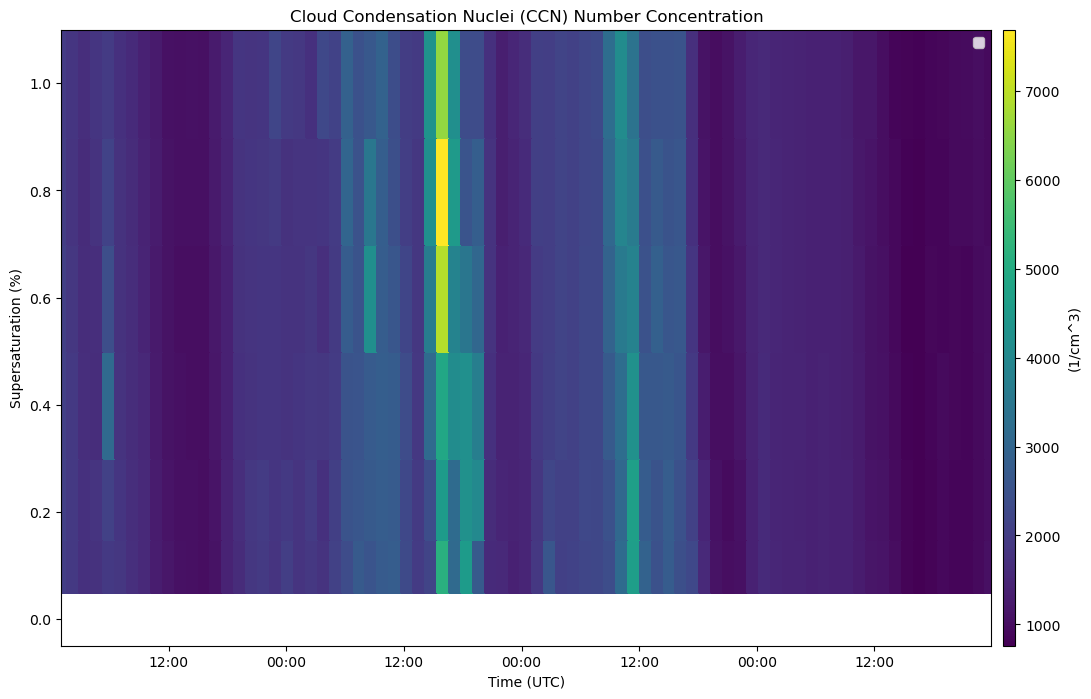

In [22]:
if 'lat' not in ds_ccn.coords:
    ds_ccn = ds_ccn.set_coords(['lat', 'lon'])

print("Variables:", list(ds_ccn.data_vars))

ccn_var = 'concentration'

# Plot
disp = act.plotting.TimeSeriesDisplay(ds_ccn, figsize=(12, 8))
disp.plot(ccn_var, label='CCN Concentration [#/cm³]')
disp.axes[0].set_title('Cloud Condensation Nuclei (CCN) Number Concentration')
disp.axes[0].set_ylabel('Supersaturation (%)')
disp.axes[0].set_xlabel('Time (UTC)')
disp.day_night_background()
disp.axes[0].legend()

plt.show()

In [28]:
import act
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Set your username and token here
username = 'mallain'
token = '10fd692feea71fb1'

#Set the datastream and start/enddates
datastream = 'bnfaosccn2colaspectraM1.b1'
startdate = '2025-05-08'
enddate = '2025-05-11T23:59:59'

In [31]:
# Download and read data
files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds = act.io.read_arm_netcdf(files)
ds.clean.cleanup()

#Get the list of supersaturation levels and time values
supersat = ds['supersaturation_setpoint'].values  # Y-axis grouping
times = ds['time'].values

#Print all variables in the dataset
print("📋 Variables in this dataset:")
print(list(ds.data_vars))

[DOWNLOADING] bnfaosccn2colaspectraM1.b1.20250508.010251.nc
[DOWNLOADING] bnfaosccn2colaspectraM1.b1.20250509.000954.nc
[DOWNLOADING] bnfaosccn2colaspectraM1.b1.20250510.002958.nc
[DOWNLOADING] bnfaosccn2colaspectraM1.b1.20250511.005002.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Uin, J., Andrews, E., Enekwizu, O., Hayes, C., & Salwen, C. Cloud
Condensation Nuclei Particle Counter (AOSCCN2COLASPECTRA), 2025-05-08 to
2025-05-11, Bankhead National Forest, AL, USA; Long-term Mobile Facility (BNF),
Bankhead National Forest, AL, AMF3 (Main Site) (M1). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1323896

📋 Variables in this dataset:
['base_time', 'time_offset', 'time_bounds', 'setpoint_time', 'supersaturation_calculated', 'N_CCN', 'qc_N_CCN', 'N_CCN_fit_coefs', 'N_CCN_fit_error', 'N_CCN_fit_value', 'concentration', 'f_CCN', 'qc_f_CCN', 'lat', 'lon', 'alt']


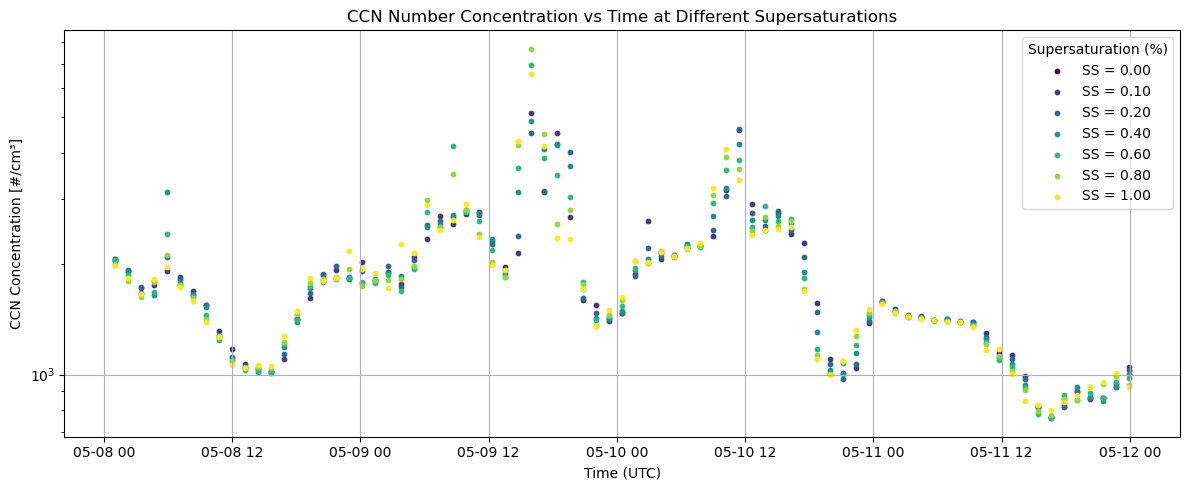

In [34]:
#Get supersaturation levels and time
supersat = ds['supersaturation_setpoint'].values
times = ds['time'].values

#Create the plot
fig, ax = plt.subplots(figsize=(12, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(supersat)))

#Plot one trace per supersaturation level
for i, ss in enumerate(supersat):
    ccn = ds['concentration'].sel(supersaturation_setpoint=ss)
    valid = ~ccn.isnull()
    ax.scatter(times[valid], ccn.values[valid], s=10, color=colors[i], label=f'SS = {ss:.2f}')

#Plot makeup
ax.set_title('CCN Number Concentration vs Time at Different Supersaturations')
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('CCN Concentration [#/cm³]')
ax.set_yscale('log')
ax.legend(title='Supersaturation (%)')
ax.grid(True)
plt.tight_layout()
plt.show()

# Pluvio Precipitation Plot


In [40]:
import act
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# Set your username and token here!
username = 'mallain'
token = '10fd692feea71fb1'

In [42]:
# Set the datastream and start/enddates
datastream = 'bnfwbpluvio2M1.a1'
startdate = '2025-05-08'
enddate = '2025-05-11T23:59:59'

In [43]:
# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_rain = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

# Let's read in the data using ACT and check out the data
ds_rain = act.io.read_arm_netcdf(result_rain)
ds_rain.clean.cleanup()

[DOWNLOADING] bnfwbpluvio2M1.a1.20250511.000000.nc
[DOWNLOADING] bnfwbpluvio2M1.a1.20250509.000000.nc
[DOWNLOADING] bnfwbpluvio2M1.a1.20250510.000000.nc
[DOWNLOADING] bnfwbpluvio2M1.a1.20250508.000000.nc

If you use these data to prepare a publication, please cite:

Zhu, Z., Wang, D., Jane, M., Cromwell, E., Sturm, M., Irving, K., & Delamere, J.
Weighing Bucket Precipitation Gauge (WBPLUVIO2), 2025-05-08 to 2025-05-11,
Bankhead National Forest, AL, USA; Long-term Mobile Facility (BNF), Bankhead
National Forest, AL, AMF3 (Main Site) (M1). Atmospheric Radiation Measurement
(ARM) User Facility. https://doi.org/10.5439/1338194



In [44]:
#printing output label
print("Available rain-related variables:")
#printing list of variables
print(list(ds_rain.data_vars))
#saving rain variables
rain_rate_var = 'intensity_rt'
#giving a shortcut
ds = ds_rain

Available rain-related variables:
['base_time', 'time_offset', 'intensity_rt', 'accum_rtnrt', 'accum_nrt', 'accum_total_nrt', 'bucket_rt', 'bucket_nrt', 'load_cell_temp', 'heater_status', 'pluvio_status', 'elec_unit_temp', 'supply_volts', 'orifice_temp', 'maintenance_flag', 'reset_flag', 'volt_min', 'ptemp', 'intensity_rtnrt', 'lat', 'lon', 'alt']


In [1]:
#downloading and reading rain data
result_rain = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_rain = act.io.read_arm_netcdf(result_rain)
#cleaning up data (QC control)
ds_rain.clean.cleanup()

#store data
rain_rate_var = 'intensity_rt'
df_rain = ds_rain[rain_rate_var].to_dataframe().dropna()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_rain.index,
    y=df_rain[rain_rate_var],
    mode='lines+markers',
    name='Rain Rate [mm/hr]',
    line=dict(color='blue')
))

fig.update_layout(
    title='Rain Rate (Pluvio2)',
    xaxis_title='Time (UTC)',
    yaxis_title='Rain Rate [mm/hr]',
    hovermode='x unified',
    template='plotly_white',
    height=500,
)

fig.show()

NameError: name 'act' is not defined